In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_125520/1155928800.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df1 = pd.read_csv('XAU_USD_Historical_Data_2000_2010.csv', parse_dates=[0])
df2 = pd.read_csv('XAU_USD_Historical_Data_2010_2023.csv', parse_dates=[0])

In [3]:
dfs = [df2, df1]
gold_usd = pd.concat(dfs)

In [4]:
gold_usd.head()

Date     Price      Open      High       Low  Vol. Change %
0 2010-01-01  1,097.35  1,097.25  1,097.90  1,097.05   NaN    0.10%
1 2010-01-04  1,120.40  1,096.25  1,123.80  1,093.45   NaN    2.10%
2 2010-01-05  1,119.05  1,121.30  1,128.10  1,115.25   NaN   -0.12%
3 2010-01-06  1,138.90  1,118.40  1,140.60  1,116.00   NaN    1.77%
4 2010-01-07  1,132.30  1,138.20  1,139.15  1,128.60   NaN   -0.58%

In [5]:
gold_usd.Date.min()

Timestamp('2000-01-03 00:00:00')

In [6]:
gold_usd.Date.max()

Timestamp('2023-09-07 00:00:00')

In [7]:
gold_usd.index = gold_usd.Date

In [8]:
gold_usd.head()

Date     Price      Open      High       Low  Vol. Change %
Date                                                                        
2010-01-01 2010-01-01  1,097.35  1,097.25  1,097.90  1,097.05   NaN    0.10%
2010-01-04 2010-01-04  1,120.40  1,096.25  1,123.80  1,093.45   NaN    2.10%
2010-01-05 2010-01-05  1,119.05  1,121.30  1,128.10  1,115.25   NaN   -0.12%
2010-01-06 2010-01-06  1,138.90  1,118.40  1,140.60  1,116.00   NaN    1.77%
2010-01-07 2010-01-07  1,132.30  1,138.20  1,139.15  1,128.60   NaN   -0.58%

In [9]:
gold_usd.drop('Date', inplace=True, axis=1)

In [10]:
gold_usd.head()

Price      Open      High       Low  Vol. Change %
Date                                                             
2010-01-01  1,097.35  1,097.25  1,097.90  1,097.05   NaN    0.10%
2010-01-04  1,120.40  1,096.25  1,123.80  1,093.45   NaN    2.10%
2010-01-05  1,119.05  1,121.30  1,128.10  1,115.25   NaN   -0.12%
2010-01-06  1,138.90  1,118.40  1,140.60  1,116.00   NaN    1.77%
2010-01-07  1,132.30  1,138.20  1,139.15  1,128.60   NaN   -0.58%

In [11]:
gold_usd.describe()

Vol.
count   0.0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN

In [12]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   object 
 1   Open      6168 non-null   object 
 2   High      6168 non-null   object 
 3   Low       6168 non-null   object 
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(1), object(5)
memory usage: 337.3+ KB


In [13]:
type(gold_usd.Price[0])

str

In [14]:
for col in ['Price', 'Open', 'High', 'Low']:
    gold_usd[col] = gold_usd[col].map(lambda row : float(row.replace(',', '')))

In [15]:
gold_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   float64
 1   Open      6168 non-null   float64
 2   High      6168 non-null   float64
 3   Low       6168 non-null   float64
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   object 
dtypes: float64(5), object(1)
memory usage: 337.3+ KB


In [16]:
gold_usd['Change %'] = gold_usd['Change %'].map(lambda x: float(x.replace('%', '')))

In [17]:
gold_usd.drop('Vol.', inplace=True, axis=1)

In [18]:
gold_usd.head()

Price     Open     High      Low  Change %
Date                                                    
2010-01-01  1097.35  1097.25  1097.90  1097.05      0.10
2010-01-04  1120.40  1096.25  1123.80  1093.45      2.10
2010-01-05  1119.05  1121.30  1128.10  1115.25     -0.12
2010-01-06  1138.90  1118.40  1140.60  1116.00      1.77
2010-01-07  1132.30  1138.20  1139.15  1128.60     -0.58

In [19]:
gold_usd.index.is_monotonic_decreasing

False

In [20]:
gold_usd.index.is_monotonic_increasing

False

In [21]:
gold_usd = gold_usd.sort_index()

In [22]:
gold_usd.index.is_monotonic_increasing

True

In [23]:
def display_plot(data, title):
    data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

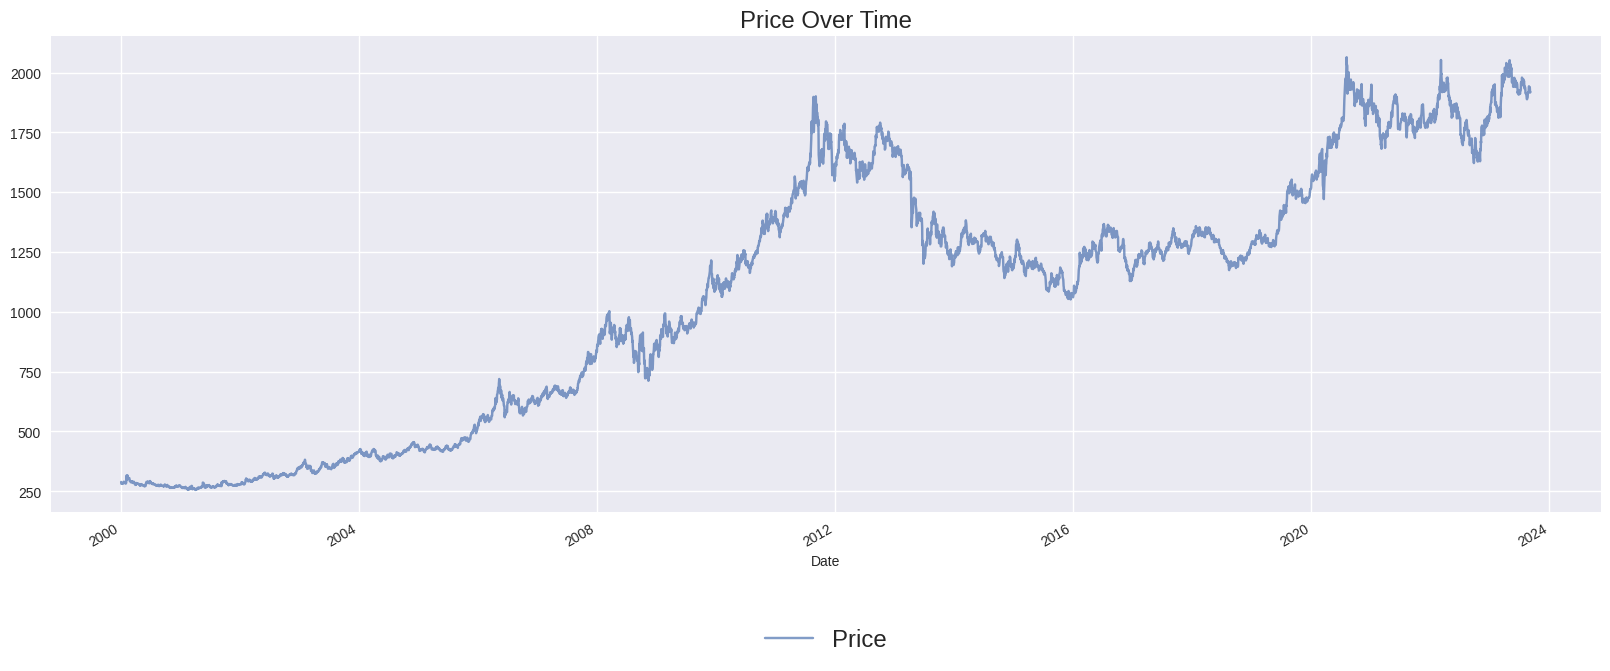

In [24]:
gold_price = gold_usd.Price
display_plot(gold_price, 'Price Over Time')

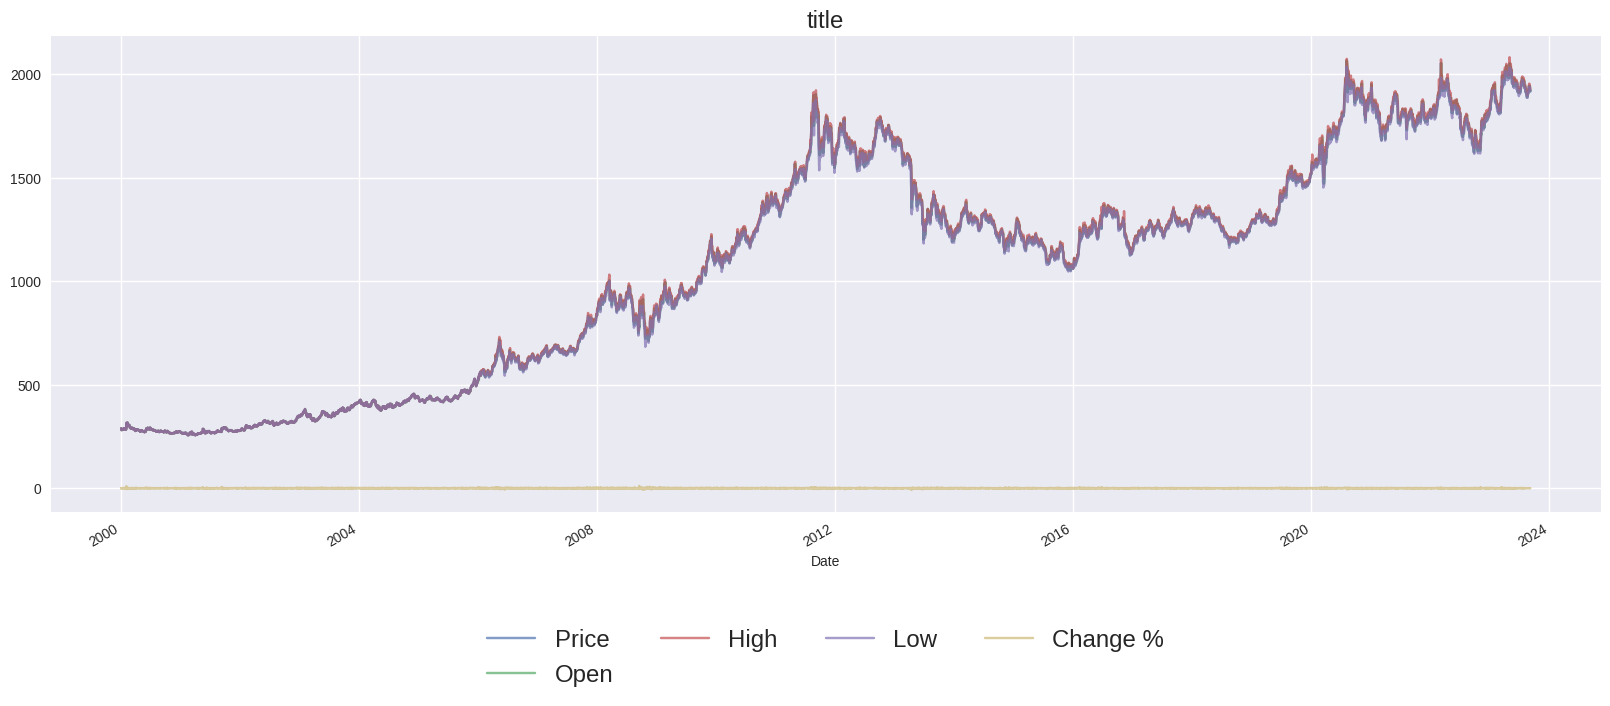

In [25]:
display_plot(gold_usd, 'title')

In [26]:
gold_usd['DayOfWeek'] = gold_usd.index.day_name()
gold_usd.head(10)

Price    Open    High     Low  Change %  DayOfWeek
Date                                                           
2000-01-03  289.00  288.50  289.00  289.00      0.26     Monday
2000-01-04  282.45  288.75  282.45  282.45     -2.27    Tuesday
2000-01-05  281.00  281.50  281.00  281.00     -0.51  Wednesday
2000-01-06  281.23  280.12  281.23  281.23      0.08   Thursday
2000-01-07  281.75  281.15  281.75  281.75      0.18     Friday
2000-01-10  281.48  281.88  281.48  281.48     -0.10     Monday
2000-01-11  283.38  281.48  283.38  283.38      0.68    Tuesday
2000-01-12  282.48  283.27  282.48  282.48     -0.32  Wednesday
2000-01-13  284.25  282.60  284.25  284.25      0.63   Thursday
2000-01-14  284.00  284.20  284.00  284.00     -0.09     Friday

In [27]:
gold_usd.shape

(6168, 6)

In [28]:
test_date = '2023-06-01'
train_data, test_data = gold_usd[gold_usd.index < test_date], gold_usd[gold_usd.index >= test_date]
train_data.tail()

Price     Open     High      Low  Change %  DayOfWeek
Date                                                               
2023-05-25  1940.34  1958.13  1964.95  1938.86     -0.85   Thursday
2023-05-26  1946.33  1940.69  1957.40  1936.84      0.31     Friday
2023-05-29  1942.84  1944.09  1949.75  1940.30     -0.18     Monday
2023-05-30  1959.14  1944.19  1963.63  1932.08      0.84    Tuesday
2023-05-31  1962.30  1959.30  1975.34  1953.67      0.16  Wednesday

In [29]:
test_data.shape

(71, 6)

In [30]:
train_data

Price     Open     High      Low  Change %  DayOfWeek
Date                                                               
2000-01-03   289.00   288.50   289.00   289.00      0.26     Monday
2000-01-04   282.45   288.75   282.45   282.45     -2.27    Tuesday
2000-01-05   281.00   281.50   281.00   281.00     -0.51  Wednesday
2000-01-06   281.23   280.12   281.23   281.23      0.08   Thursday
2000-01-07   281.75   281.15   281.75   281.75      0.18     Friday
...             ...      ...      ...      ...       ...        ...
2023-05-25  1940.34  1958.13  1964.95  1938.86     -0.85   Thursday
2023-05-26  1946.33  1940.69  1957.40  1936.84      0.31     Friday
2023-05-29  1942.84  1944.09  1949.75  1940.30     -0.18     Monday
2023-05-30  1959.14  1944.19  1963.63  1932.08      0.84    Tuesday
2023-05-31  1962.30  1959.30  1975.34  1953.67      0.16  Wednesday

[6097 rows x 6 columns]

In [31]:
train_diff = train_data[['Price', 'Open', 'High', 'Low', 'Change %']].diff().dropna()

In [32]:
train_diff.head()

Price  Open  High   Low  Change %
Date                                         
2000-01-04  -6.55  0.25 -6.55 -6.55     -2.53
2000-01-05  -1.45 -7.25 -1.45 -1.45      1.76
2000-01-06   0.23 -1.38  0.23  0.23      0.59
2000-01-07   0.52  1.03  0.52  0.52      0.10
2000-01-10  -0.27  0.73 -0.27 -0.27     -0.28

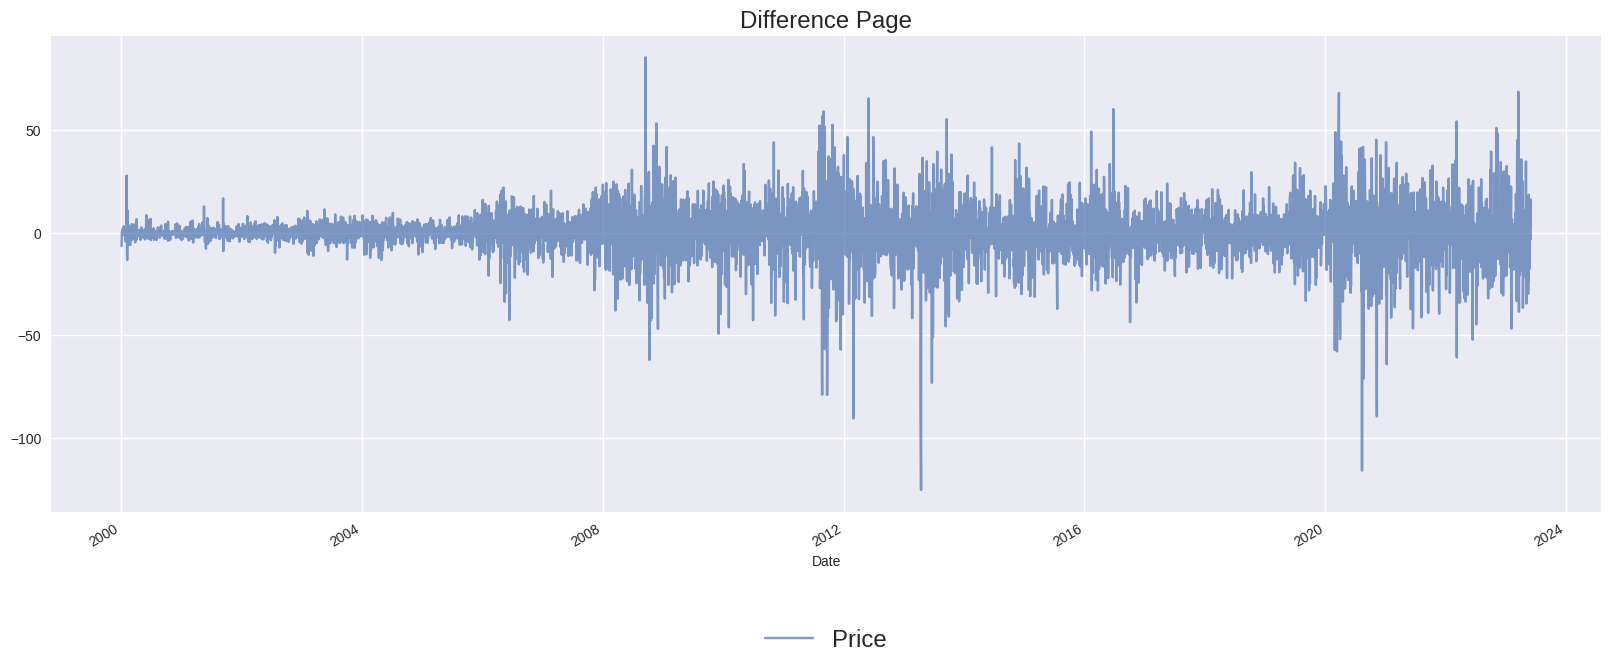

In [33]:
display_plot(train_diff['Price'], 'Difference Page')

In [34]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(series, name):
    
    result = adfuller(series.values)
    print(f'\n    Augmented Dickey-Fuller Test on {name}', "\n   ", '-'*40)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32m    Stationary\u001b[0m")
    else:
        print("\x1b[31m    Non-stationary\x1b[0m")
    print('    ','-'*40)

In [35]:
check_stationarity(train_diff['Price'], 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -56.170026
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
    Stationary
     ----------------------------------------


In [36]:
check_stationarity(train_data['Price'], 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -0.695518
p-value: 0.847907
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
    Non-stationary
     ----------------------------------------


### doc

In [41]:
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = train_data['Price']
test = test_data['Price']
start, end = int(0.99 * len(train)), int(len(train_data))
# val_date = '2023-02-01'
# train, val = train[train.index < val_date], train[train.index >= val_date]

import itertools

# Define parameter combinations to try
p_values = range(0, 5)
d_values = range(1, 2)
q_values = range(0, 5)

best_rmse = float('inf')
best_params = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        predictions = model_fit.predict(start=start, end=end, dynamic=False)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(train[end-len(predictions):], predictions))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)

    except Exception as e:
        print(e)
        continue

print("Best RMSE:", best_rmse)
print("Best Parameters (p, d, q):", best_params)

/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Best RMSE: 0.0
Best Parameters (p, d, q): (0, 1, 0)


/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


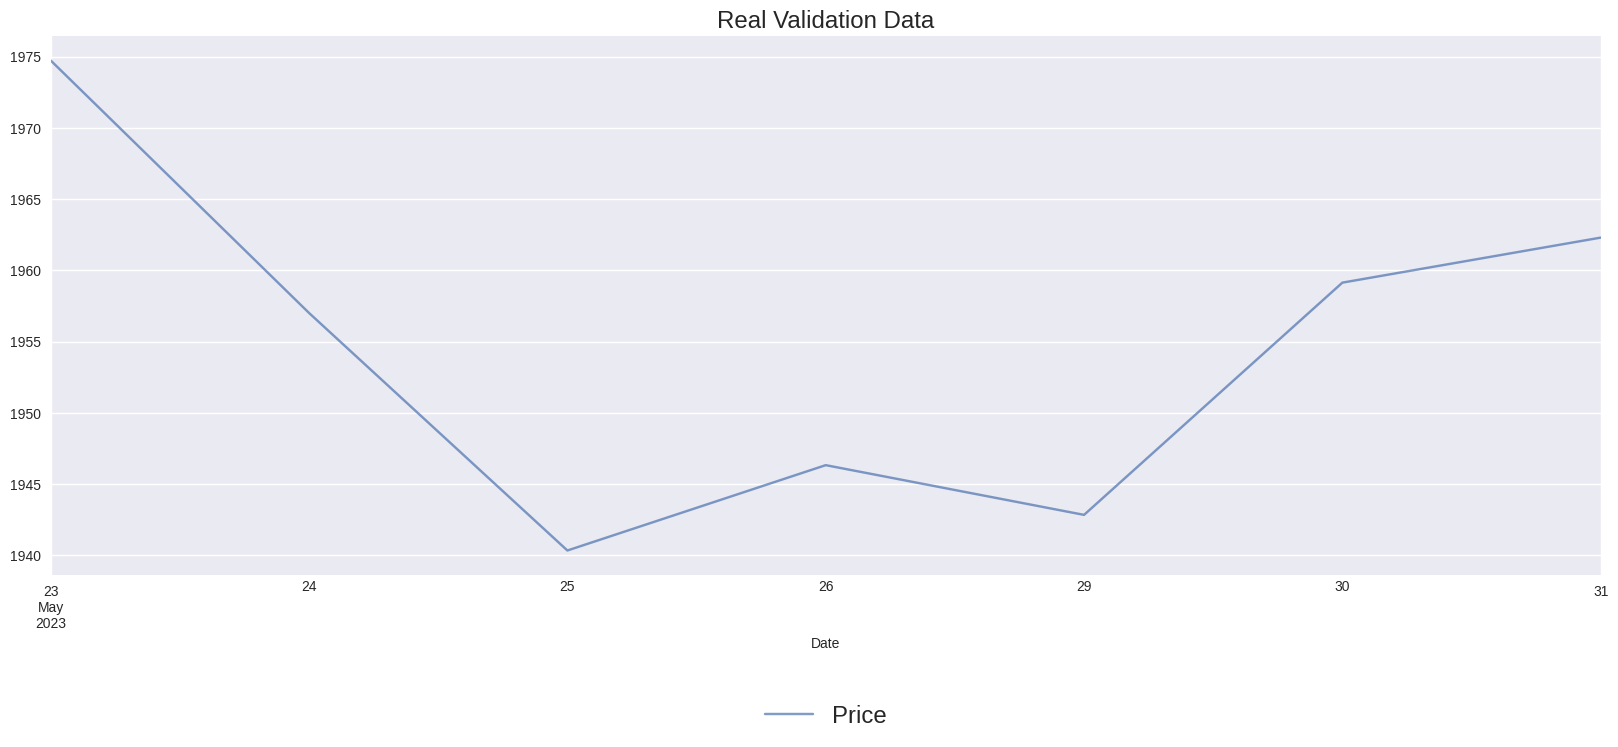

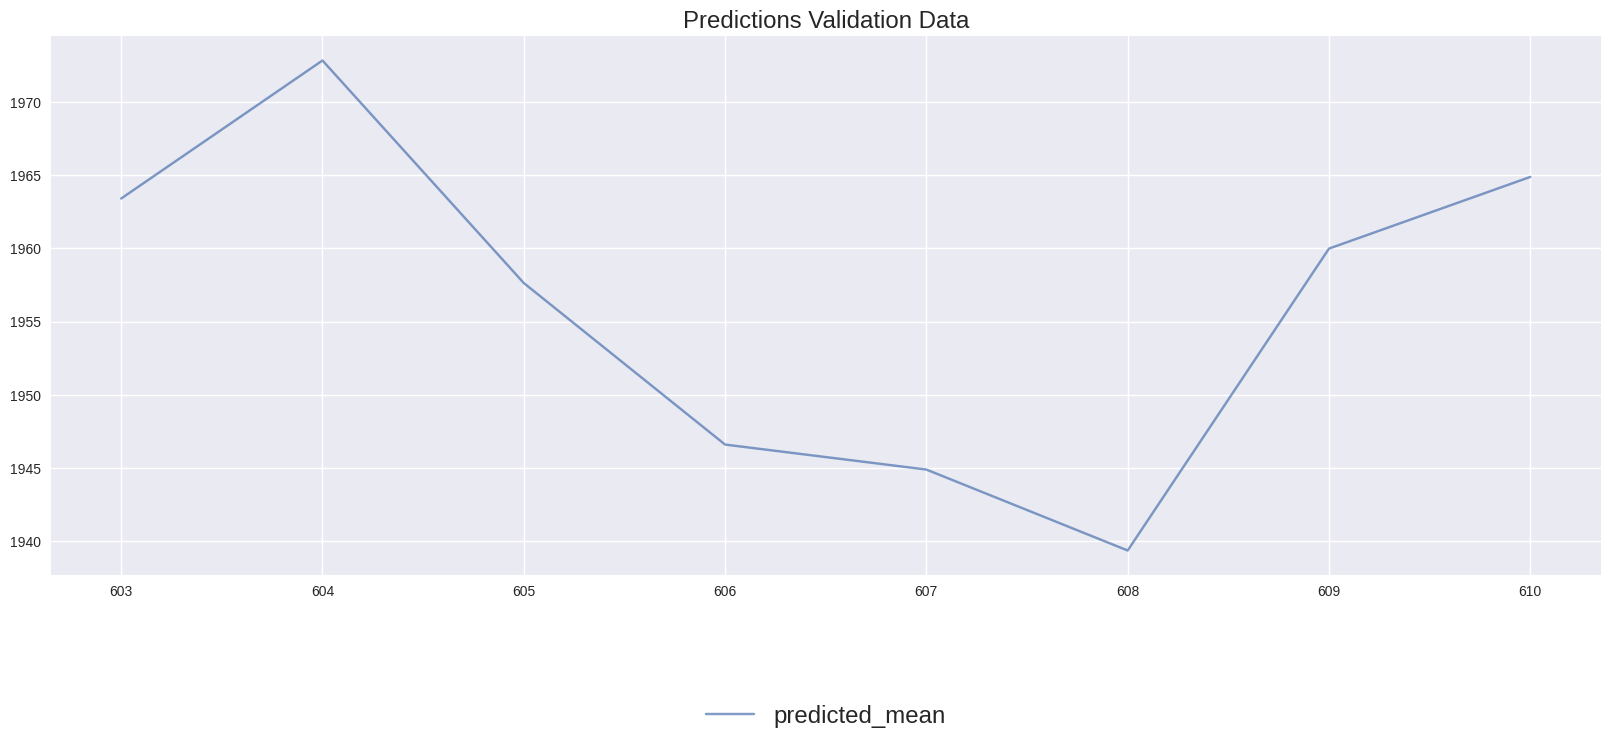

In [71]:
display_plot(train[start:end], 'Real Validation Data')
display_plot(predictions, 'Predictions Validation Data')

In [43]:
test.head()

Date
2023-06-01    1977.88
2023-06-02    1947.63
2023-06-05    1961.45
2023-06-06    1962.85
2023-06-07    1939.63
Name: Price, dtype: float64

In [77]:
test_predictions = model_fit.forecast(len(test))
rmse = np.sqrt(mean_squared_error(test, test_predictions))

/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
print(rmse)

40.212357307474946


In [79]:
df1 = pd.DataFrame(test)
df1.reset_index(inplace=True, drop=True)
df1['Predicted'] = test_predictions.reset_index(drop=True)
df1.head()

Price    Predicted
0  1977.88  1964.886095
1  1947.63  1963.156089
2  1961.45  1963.247998
3  1962.85  1965.165357
4  1939.63  1967.944920

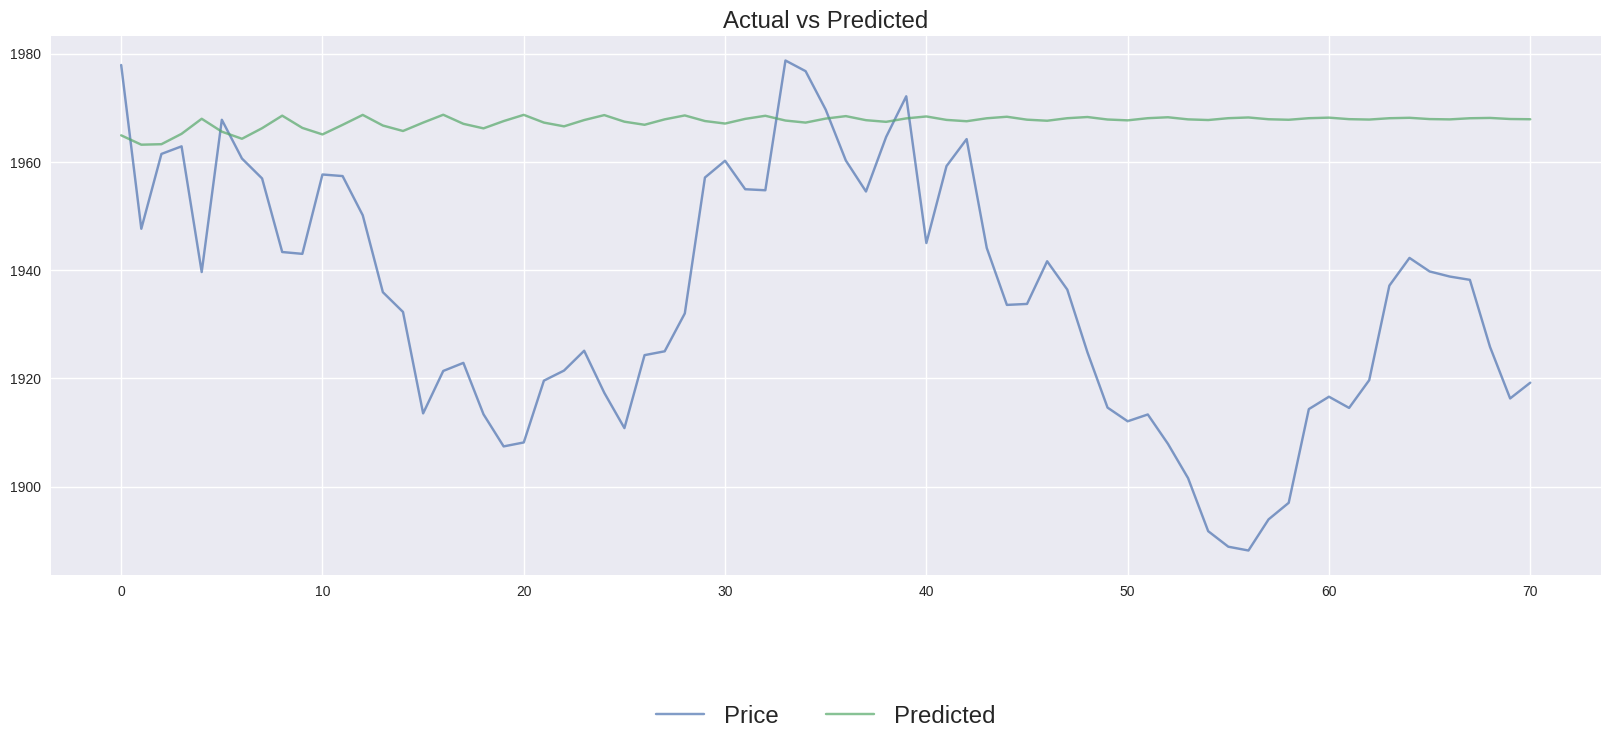

In [80]:
display_plot(df1, 'Actual vs Predicted')

### Trying another solustion

In [58]:
train.shape

(6097,)

In [59]:
test.shape

(71,)

In [62]:
train = train_data['Price']
train_start = int(0.9 * len(train))
train = train[train_start:]
len(train)

610

In [76]:
test = test_data['Price']
start, end = int(0.99 * len(train)), int(len(train))
# val_date = '2023-02-01'
# train, val = train[train.index < val_date], train[train.index >= val_date]

import itertools

# Define parameter combinations to try
p_values = range(3, 10)
d_values = range(1, 2)
q_values = range(0, 5)

best_rmse = float('inf')
best_params = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        predictions = model_fit.predict(start=start, end=end, dynamic=True)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(train[end-len(predictions):], predictions))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)

    except Exception as e:
        print(e)
        continue

print("Best RMSE:", best_rmse)
print("Best Parameters (p, d, q):", best_params)

/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Best RMSE: 13.854569474875452
Best Parameters (p, d, q): (8, 1, 4)


/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/omar/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Trying another ARIMA model